In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys


In [3]:
miseq_output_folder = r'/lab/weissman_imaging/Ultima/20240524-waferFlex/240601_M01799_0539_000000000-DPBPM/fastq_0601_reDemultiplex'
os.listdir(miseq_output_folder)

['Stats',
 'Undetermined_S0_L001_R1_001.fastq.gz',
 'Undetermined_S0_L001_R2_001.fastq.gz',
 'Flex0524_S1_L001_R1_001.fastq.gz',
 'Flex0524_S1_L001_R2_001.fastq.gz',
 'Reports',
 'Flex.tmp.bam',
 'count.summary',
 'sorted_output_file.txt',
 'sorted_count.summary',
 'sorted_count_down.summary']

In [16]:
flex_counts = pd.read_csv(os.path.join(miseq_output_folder, 'sorted_count_down.summary'), delimiter='\s', header=None, names=['count', 'info'])
flex_counts['gene'] = flex_counts['info'].apply(lambda x: x.split('|')[1])
flex_counts['transcript'] = flex_counts['info'].apply(lambda x: x.split('|')[0])
flex_counts

/tmp/ipykernel_599087/1385808329.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  flex_counts = pd.read_csv(os.path.join(miseq_output_folder, 'sorted_count_down.summary'), delimiter='\s', header=None, names=['count', 'info'])


,count,info,gene,transcript
0,98088,ENSMUSG00000070570|Slc17a7|01e82cf,Slc17a7,ENSMUSG00000070570
1,89715,ENSMUSG00000028161|Ppp3ca|92556e2,Ppp3ca,ENSMUSG00000028161
2,81430,ENSMUSG00000061718|Ppp1r1b|02d88c6,Ppp1r1b,ENSMUSG00000061718
3,78417,ENSMUSG00000005089|Slc1a2|e29e85a,Slc1a2,ENSMUSG00000005089
4,41290,ENSMUSG00000040785|Ttc3|1167cb3,Ttc3,ENSMUSG00000040785
...,...,...,...,...
156,22,ENSMUSG00000020140|Lgr5|97a8ddf,Lgr5,ENSMUSG00000020140
157,12,ENSMUSG00000069170|Adgrv1|7a41d11,Adgrv1,ENSMUSG00000069170
158,9,ENSMUSG00000027360|Hdc|b107f59,Hdc,ENSMUSG00000027360
159,9,ENSMUSG00000018581|Dnah11|4322a08,Dnah11,ENSMUSG00000018581


In [19]:
# MERFISH:
merfish_output_folder = r'/lab/weissman_imaging/puzheng/MERFISH_analysis/20240417-untreatedbrain_MF5'
merfish_barcodes = pd.read_csv(os.path.join(merfish_output_folder,'ExportBarcodes', 'barcodes.csv'))

In [20]:
codebook_file = os.path.join(merfish_output_folder, 'codebook_0_MF5_codebook.csv')
codebook = pd.read_csv(codebook_file)

id_2_gene = {}
for _id, _gene in zip(codebook.index, codebook['name']):
    id_2_gene[_id] = _gene
    
barcode_gene_names = [id_2_gene[_id] for _id in merfish_barcodes['barcode_id']]
merfish_barcodes['gene_name'] = barcode_gene_names

In [24]:
merfish_gene_counts = merfish_barcodes['gene_name'].value_counts()

In [31]:
matched_genes, matched_merfish_counts, matched_flex_counts = [], [], []
for _gene in flex_counts['gene']:
    if _gene in list(merfish_gene_counts.index):
        print(_gene)
        matched_genes.append(_gene)
        matched_merfish_counts.append(merfish_gene_counts[_gene])
        matched_flex_counts.append(flex_counts[flex_counts['gene']==_gene]['count'].values[0])

Slc17a7
Ppp1r1b
Penk
Ntrk3
Fam107a
Pcp4l1
Gabbr2
Gad2
Coro6
Sv2b
Ptk2b
Neurod2
Syt6
Serpine2
Coro1a
Lamp5
Six3
Ecel1
S1pr1
Ntsr2
Gfra1
Zic1
Gda
Kcnk9
Spon1
Mfge8
Acsbg1
Gja1
Nbl1
Tns1
Nefh
Igfbp4
Sox9
Sox11
Cldn11
Clic6
Maf
Slc38a1
Sv2c
Pax2
Isyna1
Sulf2
Mog
Gprc5b
Syt2
Syndig1l
Tox2
Fn1
Sox10
Fgf1
Zfp536
Slc32a1
Cldn5
Prkcd
Cd34
Itih3
Sec14l5
Aldh1l1
Ermn
Slc7a10
Mylk
Megf11
Cd24a
Adcy8
Ctss
Cacng5
Gpr37l1
Egflam
Arx
Aqp4
Slco1c1
Atp10a
Fbln2
Tgfbr2
Syt10
Fstl5
Pde3a
Zfhx4
Bmp6
Tnfaip6
Fgd5
Pla2g7
Sncg
Wls
Sema5b
Col23a1
Adgrf5
Frzb
Nkx2-1
Mafb
Isl1
Sall3
Anxa2
Glra1
Slit2
Rgs5
Sntb1
Cgnl1
Ucp2
Nr2f2
Kcnj8
Igfbpl1
Th
Cobll1
Sv2c
Pax6
Lpar1
Asb2
Dlx2
Chat
C1ql1
Trh
Fzd5
Fli1
Lsp1
Adcy7
Sall1
Abcc9
Sp9
Cfap206
Nfam1
Fmo1
Vwa5b1
Slc18a2
Ranbp3l
Fbln1
Aqp1
Ctsc
A2m
Kl
Ano1
Adgrv1
Prph
Ets1
Bsx
Adgrv1
Gpr50
Lgr5
Adgrv1
Hdc
Dnah11
Lmx1b


Text(0, 0.5, 'Flex counts')

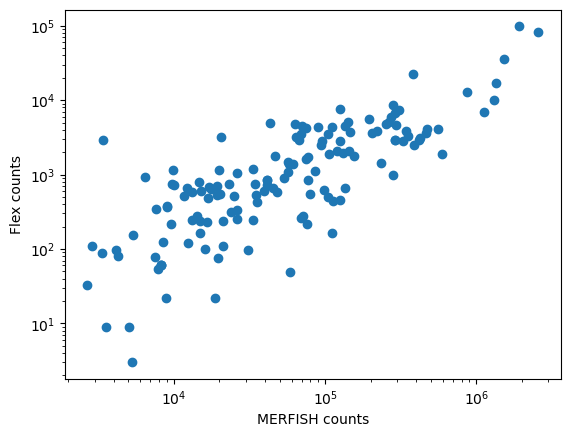

In [35]:
plt.figure()
plt.scatter(matched_merfish_counts, matched_flex_counts)
# make xy log scale
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MERFISH counts')
plt.ylabel('Flex counts')

In [38]:
# linear regression of the log-log plot, no intercept:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(np.log(matched_merfish_counts), np.log(matched_flex_counts), intercept=False)

TypeError: linregress() got an unexpected keyword argument 'intercept'

In [65]:
slope, intercept,np.exp(intercept),r_value

(0.9088626582488668,
 -3.11243730975551,
 0.04449238136467202,
 0.7968835763692714)

In [66]:
os.listdir(miseq_output_folder)

['Stats',
 'Undetermined_S0_L001_R1_001.fastq.gz',
 'Undetermined_S0_L001_R2_001.fastq.gz',
 'interleaved.fastq',
 'Flex0524_S1_L001_R1_001.fastq',
 'Reports',
 'Flex.tmp.bam',
 'count.summary',
 'sorted_output_file.txt',
 'sorted_count.summary',
 'sorted_count_down.summary',
 'duplicates.txt',
 'duplicates.fasta',
 'Flex0524_S1_L001_R2_001.fastq',
 'Flex.tmp.sam']

In [79]:
# filter the mappable reads:
r1_lines, r2_lines = [], []
sam_lines = []
# open r1,r2,sam files:
r1_file = open(os.path.join(miseq_output_folder, 'Flex0524_S1_L001_R1_001.fastq'))
r2_file = open(os.path.join(miseq_output_folder, 'Flex0524_S1_L001_R2_001.fastq'))

num_mappable = 0
# read 4 lines from r1 and r2 files:
with open(os.path.join(miseq_output_folder, 'Flex.tmp.sam')) as same_file:
    # loop till the end of the file
    while True:
        # read 4 lines from r1 and r2 files:
        _r1 = [r1_file.readline(),r1_file.readline(),r1_file.readline(),r1_file.readline()]
        _r2 = [r2_file.readline(),r2_file.readline(),r2_file.readline(),r2_file.readline()]
        # check if the read is in the unique reads:
        try:
            _sam = same_file.readline()
            _map = _sam.split('\t')[2]
            if '*' not in _map:
                r1_lines += _r1
                r2_lines += _r2
                sam_lines.append(_sam)
                num_mappable += 1
        except:
            break
        #print()
# close:
r1_file.close()
r2_file.close()
same_file.close()
print(num_mappable)

836462


In [80]:
# write r1 and r2 lines to new files:
with open(os.path.join(miseq_output_folder, 'Flex0524_S1_L001_R1_001.mappable.fastq'), 'w') as r1_out:
    r1_out.writelines(r1_lines)
with open(os.path.join(miseq_output_folder, 'Flex0524_S1_L001_R2_001.mappable.fastq'), 'w') as r2_out:
    r2_out.writelines(r2_lines)
with open(os.path.join(miseq_output_folder, 'Flex0524_S2_mappable.sam'), 'w') as sam_out:
    sam_out.writelines(sam_lines)


In [57]:
len(unique_reads)

898413

In [81]:
# load duplictate file:
duplicate_report_filename = os.path.join(miseq_output_folder, 'duplicates.fasta')
# read this as fasta file with biopython:
from Bio import SeqIO
unique_reads = []
counts = []
for record in SeqIO.parse(duplicate_report_filename, 'fasta'):
    unique_reads.append(record.seq)
    counts.append(int(record.description.split(' ')[-2].split('(')[1]))


In [84]:
len(unique_reads) / num_mappable

0.9072211289933075

In [96]:
(36315/710463),6920/36315

(0.05111455487477884, 0.19055486713479278)

In [85]:
np.unique(counts, return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  44,  45,  47,  48,  50,  55,  62,  64,  68,  80,  90,
        100, 122, 127, 141, 142]),
 array([710463,  36315,   6920,   2326,   1063,    542,    345,    203,
           148,    107,     62,     58,     47,     40,     34,     27,
            12,     16,     18,      9,      9,      5,      7,      7,
             7,     10,      4,      3,      4,      2,      3,      3,
             2,      1,      2,      6,      1,      1,      1,      2,
             1,      1,      1,      2,      2,      1,      1,      1,
             2,      1,      1,      2,      1,      1,      1,      1,
             1]))

In [98]:
np.var(counts)

0.5288822381145936

In [99]:
0.445 * 3.23

1.43735

In [103]:
len(counts) / ((np.sum(counts)/np.var(counts)) + len(counts))

0.3242390054655802

In [97]:
(np.sum(counts)/np.var(counts)) / 710463

2.22610563322428

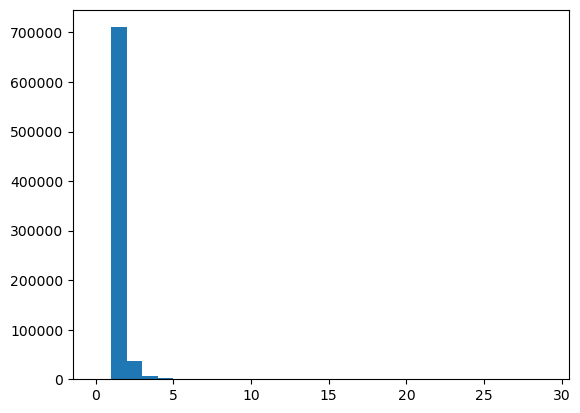

In [106]:
plt.figure()
plt.hist(counts, bins=np.arange(0,30))
#plt.yscale('log')
plt.show()